In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk as nl
#nl.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import sys,csv,re

In [4]:
data = pd.read_csv("amazon_reviews.csv")

data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [5]:
data.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [6]:
data['reviewText'] = data['reviewText'] + ' ' + data['summary']
del data['summary']

In [7]:
data['reviewText'].fillna("",inplace = True)

In [8]:
data["reviewTime"] = pd.to_datetime(data["reviewTime"])

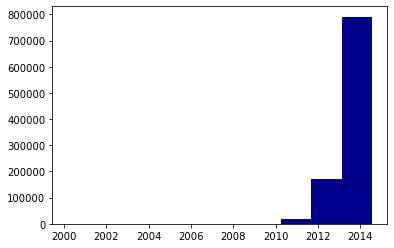

In [9]:
data['reviewTime'].hist(color = 'darkblue')
plt.grid(False)

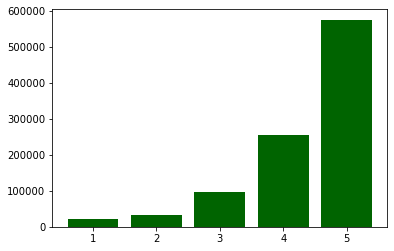

In [10]:
rate = data["overall"].value_counts()
plt.bar(rate.keys(), rate.values,color='darkgreen')
plt.show()

/var/folders/2c/sqkm4bq545d8yxrjm2m2h9740000gn/T/ipykernel_2177/558058345.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask = np.zeros_like(c, dtype = np.bool), cmap = sns.diverging_palette(-100,0,as_cmap = True),


<AxesSubplot:>

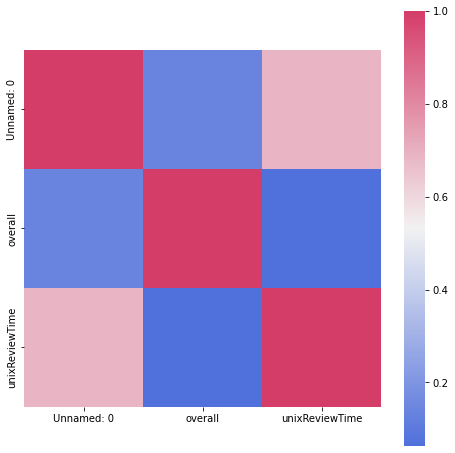

In [11]:
plt.figure(figsize=(8,8))
c = data.corr()
sns.heatmap(c, mask = np.zeros_like(c, dtype = np.bool), cmap = sns.diverging_palette(-100,0,as_cmap = True),
            square = True)

In [12]:
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200


In [13]:
# Remove Punctuation
data['reviewText_punctuation'] = data['reviewText'].str.replace('[^\w\s]','')
data.head()

/var/folders/2c/sqkm4bq545d8yxrjm2m2h9740000gn/T/ipykernel_2177/2675396870.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviewText_punctuation'] = data['reviewText'].str.replace('[^\w\s]','')


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,reviewText_punctuation
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,i enjoy vintage books and movies so i enjoyed ...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,this book is a reissue of an old one the autho...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600,this was a fairly interesting read it had old ...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,id never read any of the amy brewster mysterie...
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,if you like period pieces clothing lingo you ...


In [14]:
# LowerCase
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,reviewText_punctuation
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,i enjoy vintage books and movies so i enjoyed ...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,this book is a reissue of an old one the autho...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600,this was a fairly interesting read it had old ...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,id never read any of the amy brewster mysterie...
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,if you like period pieces clothing lingo you ...


In [15]:
# Stopwords
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
data['reviewText_stopwords']  = data['reviewText_punctuation'] .apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,reviewText_punctuation,reviewText_stopwords
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading boo...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,this book is a reissue of an old one the autho...,book reissue old one author born 1910 era say ...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600,this was a fairly interesting read it had old ...,fairly interesting read old style terminologyi...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,id never read any of the amy brewster mysterie...,id never read amy brewster mysteries one reall...
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...


In [16]:
# Import textblob
! pip install -U textblob

In [17]:
#Tokenization 
import textblob           
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text
data['reviewText_tokenized'] = data['reviewText_stopwords'].apply(lambda x: tokenization(x.lower()))
data[['reviewText', 'reviewText_punctuation', 'reviewText_stopwords', 'reviewText_tokenized']][0:9]

,reviewText,reviewText_punctuation,reviewText_stopwords,reviewText_tokenized
0,i enjoy vintage books and movies so i enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading boo...,"[enjoy, vintage, books, movies, enjoyed, readi..."
1,this book is a reissue of an old one; the auth...,this book is a reissue of an old one the autho...,book reissue old one author born 1910 era say ...,"[book, reissue, old, one, author, born, 1910, ..."
2,this was a fairly interesting read. it had old...,this was a fairly interesting read it had old ...,fairly interesting read old style terminologyi...,"[fairly, interesting, read, old, style, termin..."
3,i'd never read any of the amy brewster mysteri...,id never read any of the amy brewster mysterie...,id never read amy brewster mysteries one reall...,"[id, never, read, amy, brewster, mysteries, on..."
4,"if you like period pieces - clothing, lingo, y...",if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...,"[like, period, pieces, clothing, lingo, enjoy,..."
5,a beautiful in-depth character description mak...,a beautiful indepth character description make...,beautiful indepth character description makes ...,"[beautiful, indepth, character, description, m..."
6,i enjoyed this one tho i'm not sure why it's c...,i enjoyed this one tho im not sure why its cal...,enjoyed one tho im sure called amy brewster my...,"[enjoyed, one, tho, im, sure, called, amy, bre..."
7,never heard of amy brewster. but i don't need ...,never heard of amy brewster but i dont need to...,never heard amy brewster dont need like amy br...,"[never, heard, amy, brewster, dont, need, like..."
8,darth maul working under cloak of darkness com...,darth maul working under cloak of darkness com...,darth maul working cloak darkness committing s...,"[darth, maul, working, cloak, darkness, commit..."


In [18]:
#Lemmatization

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['reviewText_lemmatized'] = data['reviewText_tokenized'].apply(lambda x: lemmatizer(x))
data[['reviewText', 'reviewText_punctuation', 'reviewText_tokenized','reviewText_stopwords','reviewText_lemmatized']][0:9]

,reviewText,reviewText_punctuation,reviewText_tokenized,reviewText_stopwords,reviewText_lemmatized
0,i enjoy vintage books and movies so i enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,"[enjoy, vintage, books, movies, enjoyed, readi...",enjoy vintage books movies enjoyed reading boo...,"[enjoy, vintage, book, movie, enjoyed, reading..."
1,this book is a reissue of an old one; the auth...,this book is a reissue of an old one the autho...,"[book, reissue, old, one, author, born, 1910, ...",book reissue old one author born 1910 era say ...,"[book, reissue, old, one, author, born, 1910, ..."
2,this was a fairly interesting read. it had old...,this was a fairly interesting read it had old ...,"[fairly, interesting, read, old, style, termin...",fairly interesting read old style terminologyi...,"[fairly, interesting, read, old, style, termin..."
3,i'd never read any of the amy brewster mysteri...,id never read any of the amy brewster mysterie...,"[id, never, read, amy, brewster, mysteries, on...",id never read amy brewster mysteries one reall...,"[id, never, read, amy, brewster, mystery, one,..."
4,"if you like period pieces - clothing, lingo, y...",if you like period pieces clothing lingo you ...,"[like, period, pieces, clothing, lingo, enjoy,...",like period pieces clothing lingo enjoy myster...,"[like, period, piece, clothing, lingo, enjoy, ..."
5,a beautiful in-depth character description mak...,a beautiful indepth character description make...,"[beautiful, indepth, character, description, m...",beautiful indepth character description makes ...,"[beautiful, indepth, character, description, m..."
6,i enjoyed this one tho i'm not sure why it's c...,i enjoyed this one tho im not sure why its cal...,"[enjoyed, one, tho, im, sure, called, amy, bre...",enjoyed one tho im sure called amy brewster my...,"[enjoyed, one, tho, im, sure, called, amy, bre..."
7,never heard of amy brewster. but i don't need ...,never heard of amy brewster but i dont need to...,"[never, heard, amy, brewster, dont, need, like...",never heard amy brewster dont need like amy br...,"[never, heard, amy, brewster, dont, need, like..."
8,darth maul working under cloak of darkness com...,darth maul working under cloak of darkness com...,"[darth, maul, working, cloak, darkness, commit...",darth maul working cloak darkness committing s...,"[darth, maul, working, cloak, darkness, commit..."


In [19]:
# Export Cleaned Amazon data
data.head()
data.to_csv('amazon_Reviews_Cleaned.csv')